# 1. Perkenalan

Nama : Adnan Rio

Batch : FTDS-014

Dataset     :   https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Objective : 

Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

-   Mampu memahami konsep Artificial Neural Network.
-   Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
-   Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
-   Mampu menganalisis dan menjelaskan layer yang dibuat.

---
# 2. Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [125]:
#import libraries column
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,LabelEncoder
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
import pickle

---
# 3. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dl

In [10]:
#Data Loading from csv and show head data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
#show tail data
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [12]:
# copy df keeping original data safe
df_copy = df.copy()

In [13]:
# view the data distribution
df_copy.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
# show missing value count per column 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
#check type totalcharge
type(df_copy['TotalCharges'][1])

str

The total charges is known to be in str format (object), but actually it is in number(float), therefore change the format to float.

In [16]:
#change type of total charges
df_copy['TotalCharges'] =  pd.to_numeric(df_copy['TotalCharges'], errors='coerce')

In [17]:
# show missing value count per column 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There is null data in TotalCharges , seeing from the null data size is small (0.1%), the trimming method can be used if the column used.

---
# 4. Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, heatmap, central tendency dan lain sebagainya.

Target : Churn

In [18]:
#copy df untuk EDA
df_EDA = df_copy.copy()

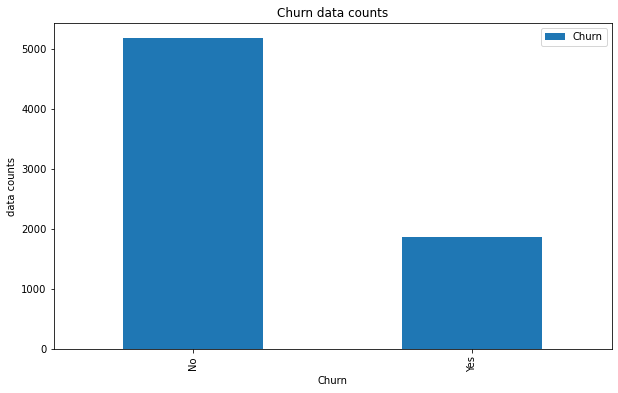

In [19]:
#groupby satisfaction
df_EDA.groupby(["Churn"])[["Churn"]].count().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Churn') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('Churn data counts') # add title to the plot

plt.show()

In [20]:
#View churn yes vs no proportion
df_EDA.groupby(["Churn"])[["Churn"]].count()

,Churn
Churn,
No,5174
Yes,1869


From the graph and table above it is shown that the data between target 1 and target 2 is mildly imbalance (73.5% vs 26.5% between No and Yes), therefore imbalance handling (smote) is needed. Continue with EDA of columns to know the data before feature selection (to reduces noise hence reduces overfitting the model).

In [21]:
# creating def for proportion calculation in bar graph
def dataplot_proportion_bar(i,target,ttle):
    
    dataunique = pd.DataFrame(df_EDA[i].unique())
    gruopeddf = df_EDA.groupby([i,target])[[target]].count()

    col3 = []
    for a in dataunique.loc[:,0]:

        try:
            k = pd.Series.item(gruopeddf.loc[a,'No'])
        except KeyError:
            k = 0

        try:
            b = pd.Series.item(gruopeddf.loc[a,'Yes'])
        except KeyError:
            b=0

        try:
            col3.append(b/(b+k))
        except ZeroDivisionError:
            col3.append(0)
        
    dataunique['proportion of churn customer'] = col3
    pd.DataFrame(dataunique)

    dataunique.rename(columns={ 0 : i}, inplace=True)
    dataunique = dataunique.sort_values(by=i, ascending=True)
    dataunique.set_index(i, inplace=True)

    dataunique.plot(kind='bar', figsize=(8, 4))
    plt.xlabel(i) # add to x-label to the plot
    plt.ylabel('data counts') # add y-label to the plot
    plt.title(ttle) # add title to the plot
    plt.show()

In [22]:
# creating def for proportion calculation in line graph
def dataplot_proportion_line(i,target,ttle):
    
    dataunique = pd.DataFrame(df_EDA[i].unique())
    gruopeddf = df_EDA.groupby([i,target])[[target]].count()

    col3 = []
    for a in dataunique.loc[:,0]:

        try:
            k = pd.Series.item(gruopeddf.loc[a,'No'])
        except KeyError:
            k = 0

        try:
            b = pd.Series.item(gruopeddf.loc[a,'Yes'])
        except KeyError:
            b=0

        try:
            col3.append(b/(b+k))
        except ZeroDivisionError:
            col3.append(0)
        
    dataunique['proportion of churn customer'] = col3
    pd.DataFrame(dataunique)

    dataunique.rename(columns={ 0 : i}, inplace=True)
    dataunique = dataunique.sort_values(by=i, ascending=True)
    dataunique.set_index(i, inplace=True)

    dataunique.plot(kind='line', figsize=(8, 4))
    plt.xlabel(i) # add to x-label to the plot
    plt.ylabel('data counts') # add y-label to the plot
    plt.title(ttle) # add title to the plot
    plt.show()

### Features that don't have effect toward customer churn

In this section, each column is compared between the number of customer with churn value is Yes and the total number of customer in that category (both Yes and No churn). The decision wether the column has effect or not is seen from the difference of Yes churn proportion accross category in each column.

Here are the columns that has small impact to the customer churn.

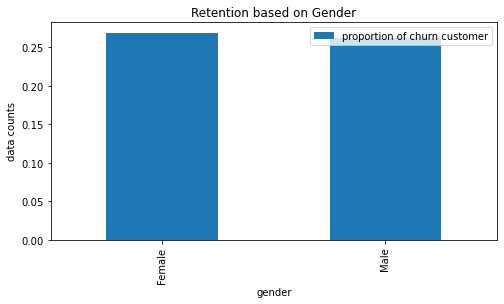

In [23]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'gender'
target = 'Churn'
ttle = 'Retention based on Gender'

dataplot_proportion_bar(i,target,ttle)

There is no significant difference between Male and Female.

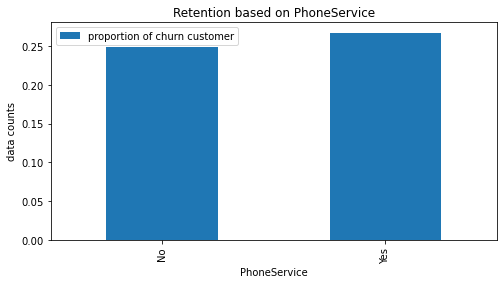

In [24]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'PhoneService'
target = 'Churn'
ttle = 'Retention based on PhoneService'

dataplot_proportion_bar(i,target,ttle)

There is no significant difference between phone service No and Yes.

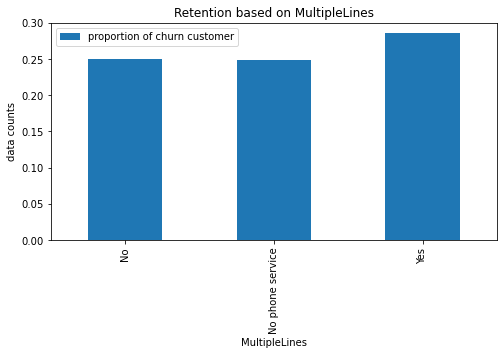

In [25]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'MultipleLines'
target = 'Churn'
ttle = 'Retention based on MultipleLines'

dataplot_proportion_bar(i,target,ttle)

There is no significant difference between Multiple Lines No, Yes, and No Phone Service.

From three graph above, all of them is seen having a very small difference in proportion of each category. It means that the number of customer churn is almost the same either the customer is in one category or another. Then, in which category the customer is in does not matter significantly towards the decision of churn.

The columns that does not have any effect to the customer churn rate is: Gender, PhoneService, and MultipleLines. The customerID is also automatically included to this, because it is a common sense that ID does not matter in the churn rate. The same logic is taken from queue number, either the customer will come back to a shop is not decided on the queue number.

### Features that have effect toward customer churn

It is the same with section before, each column is compared between the number of customer with churn value is Yes and the total number of customer in that category (both Yes and No churn). The decision wether the column has effect or not is seen from the difference of Yes churn proportion accross category in each column.

Note: high cardinality in category will be grouped in certain interval. For example monthly charge is grouped in 10 unit. With that the graph become more readable rather than a very fluctuative line graph.

Here are the columns that has significant impact to the customer churn.

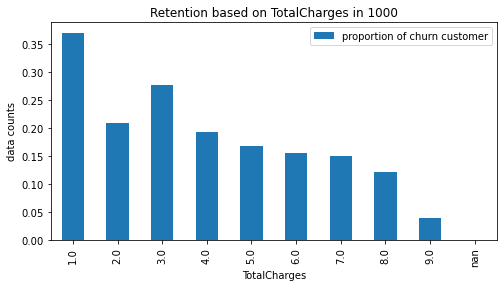

In [26]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'TotalCharges'
target = 'Churn'
ttle = 'Retention based on TotalCharges in 1000'
df_EDA[i] = np.ceil(df_EDA[i]/1000)

dataplot_proportion_bar(i,target,ttle)

The higher total charge the fewer retentioned customer is. This column has significant effect to churn.

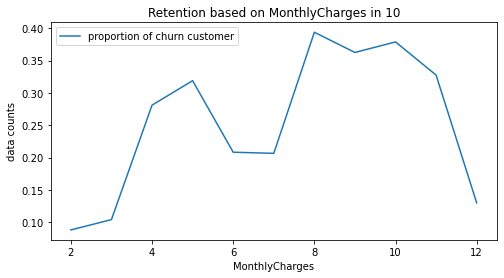

In [27]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'MonthlyCharges'
target = 'Churn'
ttle = 'Retention based on MonthlyCharges in 10'
df_EDA[i] = np.ceil(df_EDA[i]/10)

dataplot_proportion_line(i,target,ttle)

The higher monthly charge the higher retentioned customer is. This column has significant effect to churn.

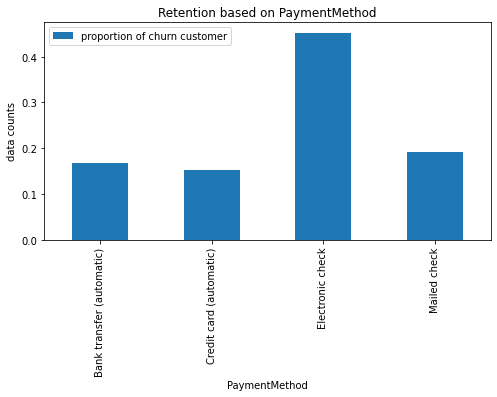

In [28]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'PaymentMethod'
target = 'Churn'
ttle = 'Retention based on PaymentMethod'

dataplot_proportion_bar(i,target,ttle)

payment method : electronic check has higher retentioned customer. This column has significant effect to churn.

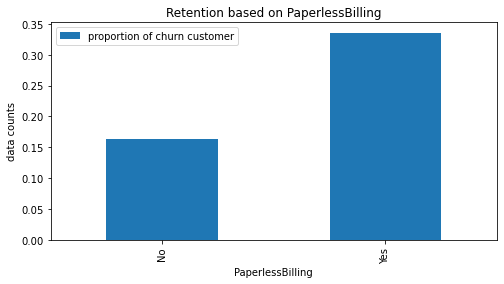

In [29]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'PaperlessBilling'
target = 'Churn'
ttle = 'Retention based on PaperlessBilling'

dataplot_proportion_bar(i,target,ttle)

Paperless billing yes has higher retentioned customer. This column has significant effect to churn.

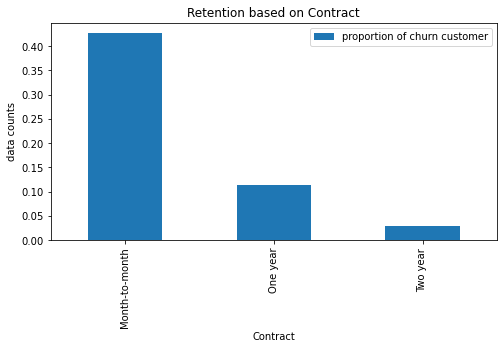

In [30]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'Contract'
target = 'Churn'
ttle = 'Retention based on Contract'

dataplot_proportion_bar(i,target,ttle)

Paperless billing Month to Month has higher retentioned customer. This column has significant effect to churn.

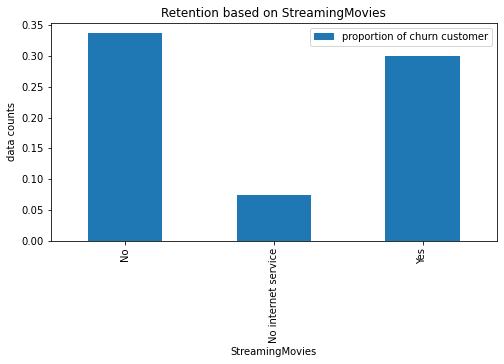

In [31]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'StreamingMovies'
target = 'Churn'
ttle = 'Retention based on StreamingMovies'

dataplot_proportion_bar(i,target,ttle)

Streaming Movies Yes and No has higher retentioned customer. This column has significant effect to churn.

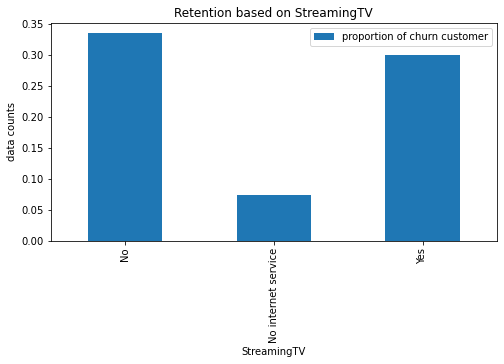

In [32]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'StreamingTV'
target = 'Churn'
ttle = 'Retention based on StreamingTV'

dataplot_proportion_bar(i,target,ttle)

StreamingTv Yes and No has higher retentioned customer. This column has significant effect to churn.

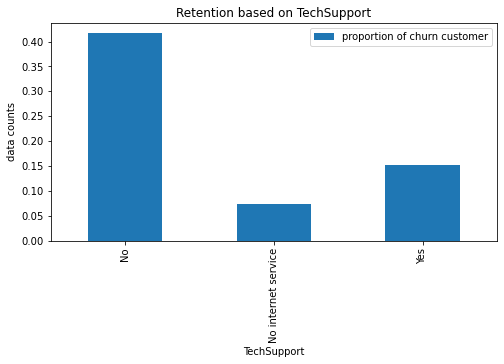

In [33]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'TechSupport'
target = 'Churn'
ttle = 'Retention based on TechSupport'

dataplot_proportion_bar(i,target,ttle)

Techsupport Yes and No has higher retentioned customer. This column has significant effect to churn.

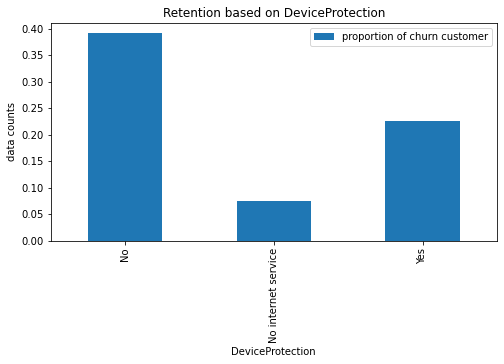

In [34]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'DeviceProtection'
target = 'Churn'
ttle = 'Retention based on DeviceProtection'

dataplot_proportion_bar(i,target,ttle)

DeviceProtection Yes and No has higher retentioned customer. This column has significant effect to churn.

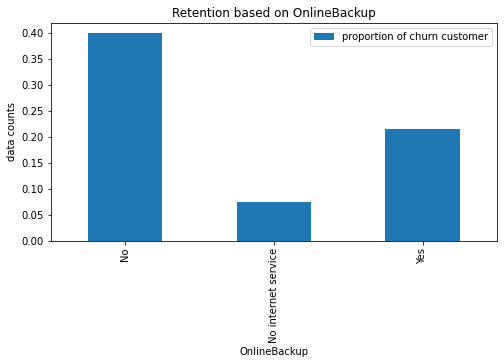

In [35]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'OnlineBackup'
target = 'Churn'
ttle = 'Retention based on OnlineBackup'

dataplot_proportion_bar(i,target,ttle)

OnlineBackup Yes and No has higher retentioned customer. This column has significant effect to churn.

In [36]:
df_EDA.groupby(['OnlineBackup','DeviceProtection'])[['DeviceProtection']].count()

DeviceProtection
OnlineBackup        DeviceProtection                     
No                  No                               1984
                    Yes                              1104
No internet service No internet service              1526
Yes                 No                               1111
                    Yes                              1318

Online Backup and Device Protection is a different features, there is no exclusive value for each value in other column.

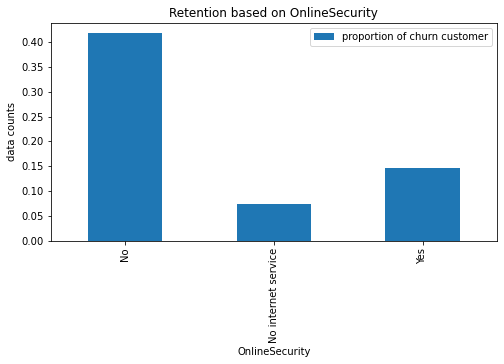

In [37]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'OnlineSecurity'
target = 'Churn'
ttle = 'Retention based on OnlineSecurity'

dataplot_proportion_bar(i,target,ttle)

Online Security No has higher retentioned customer. This column has significant effect to churn.

In [38]:
df_EDA.groupby(['OnlineBackup','OnlineSecurity'])[['OnlineSecurity']].count()

OnlineSecurity
OnlineBackup        OnlineSecurity                     
No                  No                             2195
                    Yes                             893
No internet service No internet service            1526
Yes                 No                             1303
                    Yes                            1126

Online Backup and OnlineSecurity is a different features, there is no exclusive value for each value in other column.

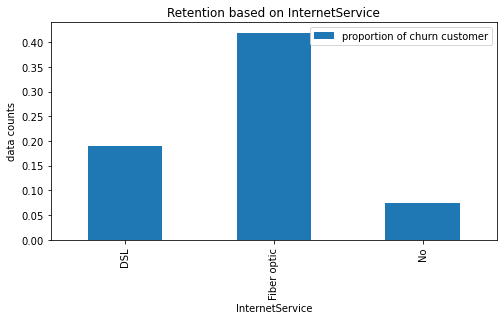

In [39]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'InternetService'
target = 'Churn'
ttle = 'Retention based on InternetService'

dataplot_proportion_bar(i,target,ttle)

Internet Service Fiber Optic has higher retentioned customer. This column has significant effect to churn.

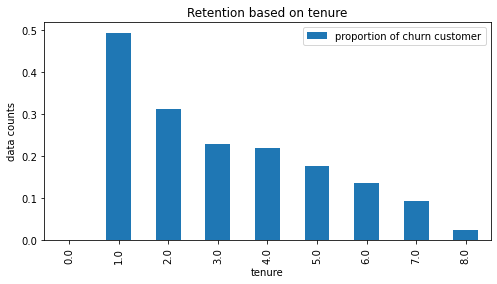

In [40]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'tenure'
target = 'Churn'
ttle = 'Retention based on tenure'
df_EDA[i] = np.ceil(df_EDA[i]/10)

dataplot_proportion_bar(i,target,ttle)

The higher is tenure, the lower retentioned customer is. This column has significant effect to churn.

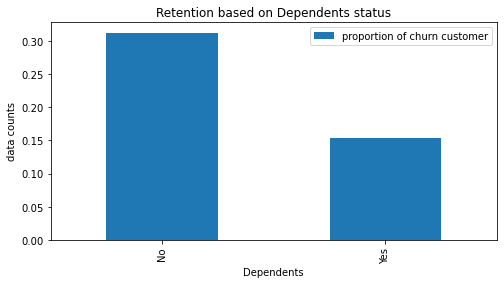

In [41]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'Dependents'
target = 'Churn'
ttle = 'Retention based on Dependents status'

dataplot_proportion_bar(i,target,ttle)

Dependents No has higher retentioned customer. This column has significant effect to churn.

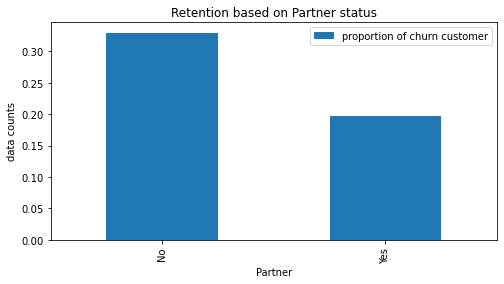

In [42]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'Partner'
target = 'Churn'
ttle = 'Retention based on Partner status'

dataplot_proportion_bar(i,target,ttle)


Partner No has higher retentioned customer. This column has significant effect to churn.

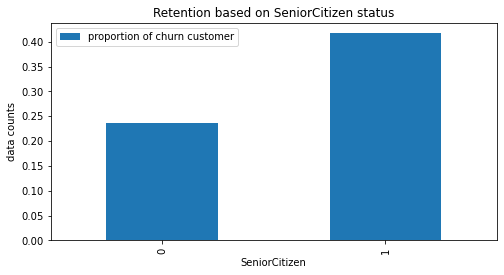

In [43]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'SeniorCitizen'
target = 'Churn'
ttle = 'Retention based on SeniorCitizen status'

dataplot_proportion_bar(i,target,ttle)


Senior citizen 1 has higher retentioned customer. This column has significant effect to churn.

From 16 graph above, all of them is seen having a significant difference in proportion between its categories. It means that the number of customer churn is different in which category the customer is in. Then, in which category the customer is in does matter significantly towards the decision of churn.

The columns that does have significant effect to the customer churn rate is: TotalCharges, MonthlyCharges, PaymentMethod, PaperlessBilling, Contract, StreamingMovies, StreamingTV, TechSupport, DeviceProtection, OnlineBackup, OnlineSecurity, InternetService, tenure, Dependents, Partner, and  SeniorCitizen.

---
# 5. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Get Data for Model Inference

In [44]:
#Get data validation with 30 row sample and lock randomize.
df_inf = df_copy.sample(30, random_state = 15)
df_inf.shape

(30, 21)

In [45]:
# delete row that used by vaidation
df_trts = df_copy.drop(df_inf.index)

# Check the shape of data after the inference is taken
df_trts.shape

(7013, 21)

In [46]:
# Reset index from the two dataframe
df_inf.reset_index(drop = True, inplace=True)
df_trts.reset_index(drop = True, inplace=True)

## Splitting Dataset, y-X and train-test

In [47]:
#Splitting dataset X as feature and y as target
X = df_trts.drop('Churn', axis = 1)
y = df_trts['Churn']

In [48]:
#Splitting dataset 80% for train and 20% for test from total dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [49]:
#Splitting dataset 80% for train and 20% for validation from xtrain
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=15)

In [50]:
#Check the train and test shape
print('Train set size: ', X_train.shape)
print('Test set size: ', X_test.shape)
print('Validation set size: ', X_val.shape)

Train set size:  (4488, 20)
Test set size:  (1403, 20)
Validation set size:  (1122, 20)


## Feature Selection

Feature Selection is done in the beginning of data preprocessing forto narrow the scope of data preprocessing so as to reduce data processing time and avoid processing data that is unused.

In [51]:
#Display X_train to see the features
X_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5522,7880-XSOJX,Male,0,No,No,4,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,42.40,146.40
4315,3244-CQPHU,Female,1,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.10,7746.70
4844,3688-FTHLT,Female,0,No,No,16,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),63.05,1067.05
6082,4819-HJPIW,Male,0,No,No,18,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,25.15,476.80
4050,3423-HHXAO,Female,0,Yes,Yes,14,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.50,272.00


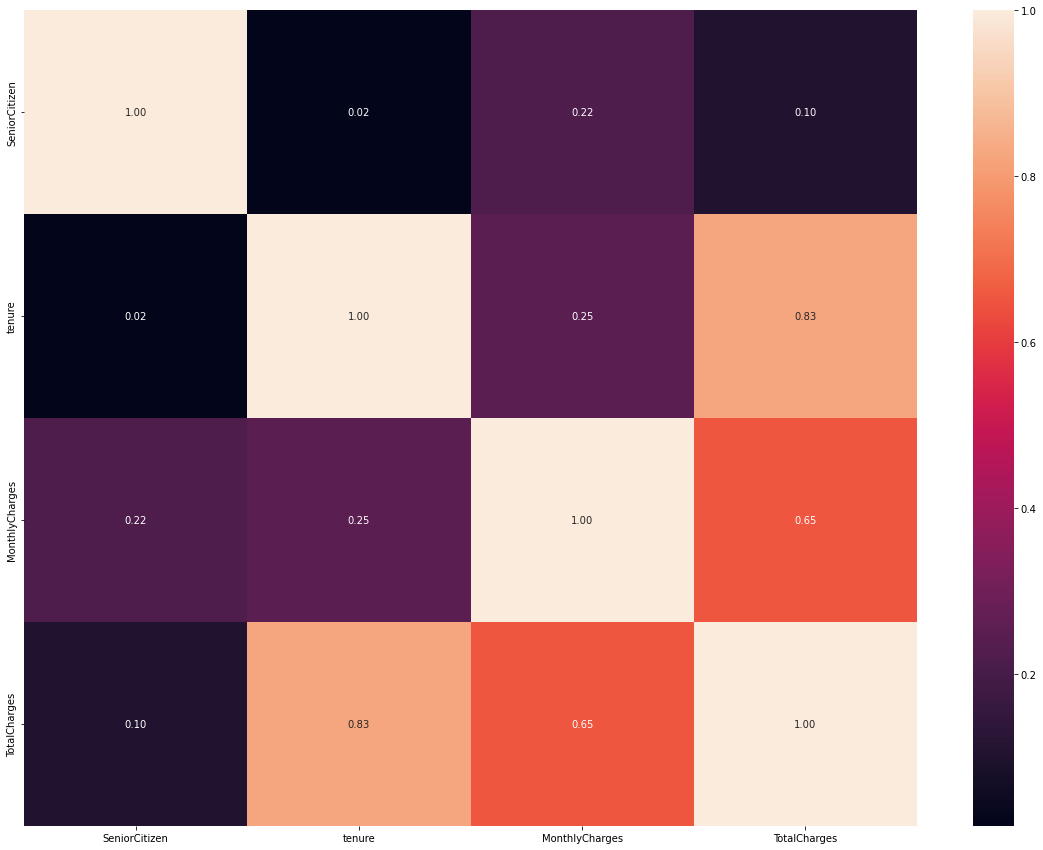

In [52]:
# Use heatmap for identifying correlation between numeric features
plt.figure(figsize=(20,15))
sns.heatmap(df_trts.corr(), annot=True, fmt='.2f')
plt.show()

There is significant correlation in monthlycharge-seniorCitizen, but because it is known that senior citizen is in numeric categorical, then this number isn't accurate. But if we see the correlation between Totalcharge-Monthlycharge and Totalcharge-tenure is high, there is strong indication that these category has strong correlation between each other.

Because of almost all of the columns in this dataset is in category, the decision of selected features is taken from EDA result, therefore category that selected are: 'Partner', 'Dependents', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','tenure', 'SeniorCitizen','MonthlyCharges','TotalCharges'. 16 categories.

In [53]:
#Keep only features that selected from previous analyzation
selected_feat= ['Partner', 'Dependents', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','tenure', 'SeniorCitizen','MonthlyCharges','TotalCharges']
X_train_fs = X_train[selected_feat]
X_test_fs = X_test[selected_feat]
X_val_fs = X_val[selected_feat]
X_test_fs.head(5)

,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
1154,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,53,0,18.70,1005.70
2562,No,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),39,1,95.65,3759.05
171,Yes,No,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,14,0,81.95,1181.75
4812,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),67,0,24.65,1620.45
5913,No,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Mailed check,18,0,33.60,550.35


## Missing value handling

In [54]:
# Looking missing value in X_train
X_train_fs.isnull().sum()

Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
tenure              0
SeniorCitizen       0
MonthlyCharges      0
TotalCharges        7
dtype: int64

In [55]:
# Looking missing value in X_test
X_test_fs.isnull().sum()

Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
tenure              0
SeniorCitizen       0
MonthlyCharges      0
TotalCharges        2
dtype: int64

In [56]:
# Looking missing value in X_val
X_val_fs.isnull().sum()

Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
tenure              0
SeniorCitizen       0
MonthlyCharges      0
TotalCharges        2
dtype: int64

There is 11 missing values that exist in the three datasets, and all of them come from TotalCharges.

In [57]:
# Looking missing value in y_train
y_train.isnull().sum().sum()

0

In [58]:
# Looking missing value in y_test
y_test.isnull().sum().sum()

0

In [59]:
# Looking missing value in y_val
y_val.isnull().sum().sum()

0

The only missing values are in the X dataset. From the quantity, 11/7013 is 0.16% and it is actually small and it is concluded that if the missing value's rows are deleted, the dataset will not lossing much of its important data. Therefore it is decided to drop the rows.

In [60]:
#finding rows with missing value in train, test, and validation dataset
MV_train = X_train_fs[
    (X_train_fs['TotalCharges'].isna())
]

MV_test = X_test_fs[
    (X_test_fs['TotalCharges'].isna())
]

MV_val = X_val_fs[
    (X_val_fs['TotalCharges'].isna())
]

In [61]:
#drop column in X
X_train_MV = X_train_fs.copy()
X_train_MV.drop(index = MV_train.index , inplace = True)

X_test_MV = X_test_fs.copy()
X_test_MV.drop(index = MV_test.index , inplace = True)

X_val_MV = X_val_fs.copy()
X_val_MV.drop(index = MV_val.index , inplace = True)

In [62]:
#drop column in y
y_train_MV = y_train.copy()
y_train_MV.drop(index = MV_train.index , inplace = True)

y_test_MV = y_test.copy()
y_test_MV.drop(index = MV_test.index , inplace = True)

y_val_MV = y_val.copy()
y_val_MV.drop(index = MV_val.index , inplace = True)

In [63]:
#check the number of missing values in dataset
X_train_MV.isnull().sum().sum() + X_test_MV.isnull().sum().sum() + X_val_MV.isnull().sum().sum() 

0

The missing values rows in X dataset are dropped, therefore there is no missing values in the new X and y dataset.

## Split between Numerical Columns and Categorical Columns

Data Splitting between numerical and categorical in done before outlier handling for ease handling of outliers and making graphs.

In [64]:
X_train_MV

,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
5522,No,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,4,0,42.40,146.40
4315,No,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),72,1,110.10,7746.70
4844,No,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),16,0,63.05,1067.05
6082,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,18,0,25.15,476.80
4050,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,14,0,19.50,272.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,No,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,16,0,81.00,1312.15
5230,No,No,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,35,1,73.00,2471.25
3700,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,11,0,102.00,1145.35
82,No,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),42,0,103.80,4327.50


There is 2 numerical column, and 14 categorical columns. In categorical, there is two columns that actually categorical in numeric format which is tenure and SeniorCitizen.

In [65]:
#choosing numerical and categorical column
num_col = ['MonthlyCharges','TotalCharges']
cat_col = ['Partner', 'Dependents', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','tenure', 'SeniorCitizen']

In [66]:
# Split data set based on categorical dan numerical
X_train_num = X_train_MV[num_col]
X_train_cat = X_train_MV[cat_col]

X_test_num = X_test_MV[num_col]
X_test_cat = X_test_MV[cat_col]

X_val_num = X_val_MV[num_col]
X_val_cat = X_val_MV[cat_col]

In [67]:
#show Xtrain cat
X_train_cat.head(3)

,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,SeniorCitizen
5522,No,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,4,0
4315,No,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),72,1
4844,No,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),16,0


In [68]:
#show Xtrain num
X_train_num.head(3)

,MonthlyCharges,TotalCharges
5522,42.40,146.40
4315,110.10,7746.70
4844,63.05,1067.05


## Outliers handling

In [69]:
# Membuat def fungsi untuk membuat histogram dan boxplot bagi numerical X_train 
def hist_boxplot(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print(variable)
    print('skewness:', df[variable].skew())
    if (df[variable].skew() <= -0.5 ) | (df[variable].skew() >= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

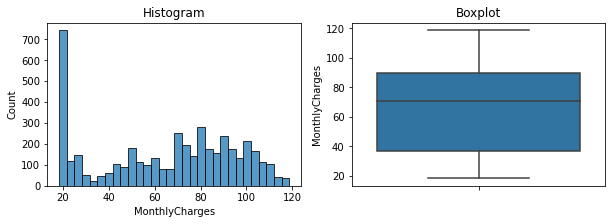

MonthlyCharges
skewness: -0.22428502640790052
the distribution is normal


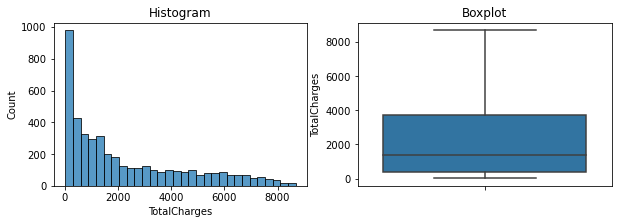

TotalCharges
skewness: 0.9817008996990214
the distribution is skewed


In [70]:
#show histogram and boxplot for all the two features in X_train num
for i in X_train_num.columns:
    hist_boxplot(X_train_num, i)

MonthlyCharges is normaly distributed and TotalCharges is skewed. For both of category there is no outliers, outliers handling isn't needed. But the scaler between categories must be separated due to difference in distribution.

## Concate between Numerical Columns and Categorical Columns

In [71]:
#concat 2 dataframe 
X_train_fin = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_fin = pd.concat([X_test_num, X_test_cat], axis=1)
X_val_fin = pd.concat([X_val_num, X_val_cat], axis=1)
X_val_fin

,MonthlyCharges,TotalCharges,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,SeniorCitizen
5344,82.50,5215.10,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),65,0
3043,70.50,3486.65,Yes,Yes,DSL,Yes,No,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),50,0
6306,106.00,6441.40,No,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,60,1
6508,102.35,3626.10,No,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),35,0
3426,60.80,2042.05,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,One year,Yes,Mailed check,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,84.60,865.55,No,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),10,1
2706,43.70,2618.30,No,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),62,0
4155,86.55,1066.90,No,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,12,0
3283,84.35,3571.60,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),42,0


## Feature Scaling

Scaling will be done with minmaxscaler for 'TotalCharges' and standard scaller for 'MonthlyCharges' with pipeline.

## Feature Encoding

Encoding will be done in pipeline with this assignment of encoding:

OneHotEncoder: 'Partner', 'Dependents', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod'

Not doing encoding (passthrough) because it is already in numeric:'tenure', 'SeniorCitizen'

Encoding by label encoder is done to y test and y train, because the y dataset is using category: 'Yes' and 'No'

In [72]:
#check dataset
y_train_MV

5522     No
4315     No
4844     No
6082     No
4050     No
       ... 
4805    Yes
5230     No
3700    Yes
82       No
1984    Yes
Name: Churn, Length: 4481, dtype: object

In [73]:
#label encoder for y dataset
labelencoder = LabelEncoder()
labelencoder.fit(y_train_MV)

y_train_enc = labelencoder.transform(y_train_MV)
y_train_enc = pd.DataFrame(y_train_enc, columns=['Churn'])

y_test_enc = labelencoder.transform(y_test_MV)
y_test_enc = pd.DataFrame(y_test_enc, columns=['Churn'])

y_val_enc = labelencoder.transform(y_val_MV)
y_val_enc = pd.DataFrame(y_val_enc, columns=['Churn'])


In [74]:
#check encoded dataset
y_train_enc

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
4476,1
4477,0
4478,1
4479,0


Label No will be converted to 0 and Yes converted to 1. Because of finding churn customer (yes) is the priority of this learning, then we focus in row 1 classification report (when 1 as 1).

In [75]:
#divide num by skew and normal, cat by ordinal and none
num_skew = ['TotalCharges']
num_norm = ['MonthlyCharges']
cat_nom = ['Partner', 'Dependents', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']
cat_none = ['tenure', 'SeniorCitizen']

In [76]:
#column transformer for each of the column category
preprocess = ColumnTransformer([
    ('numskew', MinMaxScaler(),num_skew),
    ('numnom', StandardScaler(),num_norm),
    ('catord', OneHotEncoder(),cat_nom),
    ('catnone', 'passthrough',cat_none)
])

In [77]:
#transform the features in the datasets
preprocess.fit(X_train_fin)
X_train_enc = preprocess.transform(X_train_fin)
X_test_enc = preprocess.transform(X_test_fin)
X_val_enc = preprocess.transform(X_val_fin)

In [78]:
#recheck encoding result
X_train_enc

array([[ 1.47185248e-02, -7.49605034e-01,  1.00000000e+00, ...,
         1.00000000e+00,  4.00000000e+00,  0.00000000e+00],
       [ 8.91748741e-01,  1.50922599e+00,  1.00000000e+00, ...,
         0.00000000e+00,  7.20000000e+01,  1.00000000e+00],
       [ 1.20956156e-01, -6.06115244e-02,  1.00000000e+00, ...,
         0.00000000e+00,  1.60000000e+01,  0.00000000e+00],
       ...,
       [ 1.29991519e-01,  1.23896703e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.10000000e+01,  0.00000000e+00],
       [ 4.97193037e-01,  1.29902458e+00,  1.00000000e+00, ...,
         0.00000000e+00,  4.20000000e+01,  0.00000000e+00],
       [ 1.53624242e-01,  6.63415554e-01,  1.00000000e+00, ...,
         0.00000000e+00,  1.60000000e+01,  1.00000000e+00]])

y dataset encoding and X dataset encoding and scalling are done.

## Data imbalance handling

There is data imbalance found in the beginning of EDA. Data imbalance handling for the mildly imbalance data.

In [79]:
#do data imbalance in train and val, test is skipped
smote = SMOTE(k_neighbors=5, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_enc, y_train_enc)

X_val_balanced, y_val_balanced = smote.fit_resample(X_val_enc, y_val_enc)

In [80]:
#check the imbalance result, to ensure the balancing is success
y_val_balanced.value_counts()

Churn
0        855
1        855
dtype: int64

In [81]:
#change the final dataset to DataFrame for further processing
X_train_balanced = pd.DataFrame(X_train_balanced)
X_val_balanced = pd.DataFrame(X_val_balanced)
X_test_enc = pd.DataFrame(X_test_enc)

y_train_balanced = pd.DataFrame(y_train_balanced)
y_val_balanced = pd.DataFrame(y_val_balanced)
y_test_enc = pd.DataFrame(y_test_enc)

---
# 6. Model definition

#### Sequential model

In [82]:
#make sequential model
model_s = keras.models.Sequential([
    keras.layers.Dense(96, input_shape=[38], kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.Dense(32),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.Dense(1, activation="sigmoid")
])

In [83]:
#compile the model and define the loss
model_s.compile(loss="binary_crossentropy", 
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              metrics=tf.keras.metrics.BinaryAccuracy()) 

Several parameter used in sequential model above are: kernel initializer GlorotNormal, BatchNormalization for exploding gradient problems, activation function Relu in hidden layer, activation function sigmoid in the output because of the result of model is in binary (0 and 1), optimizers is SGD to be focused in to find the converge point (valley), with the metrics of binary accuracy for accuracy in binary ouput that compare the label result and actual label.

#### Functional model

In [84]:
#make functional model
input_s = keras.layers.Input(shape=38)
initializer = keras.layers.Dense(96, kernel_initializer= tf.keras.initializers.GlorotNormal(seed=40))(input_s)
hidden1 = keras.layers.Dense(64, activation="relu")(initializer)
hidden2 = keras.layers.Dense(32, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_s, hidden2])
output = keras.layers.Dense(1, activation="sigmoid")(concat)
model_f = keras.models.Model(inputs=[input_s], outputs=[output])

In [85]:
#compile the model and define the loss
model_f.compile(loss="binary_crossentropy", 
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              metrics=tf.keras.metrics.BinaryAccuracy())

Several parameter used in functional model above are: kernel initializer GlorotNormal, activation function Relu in hidden layer, activation function sigmoid in the output because of the result of model is in binary (0 and 1), optimizers is SGD to be focused in to find the converge point (valley), with the metrics of binary accuracy for accuracy in binary ouput that compare the label result and actual label.

#### Improvement Model

In [86]:
#make improvement model
model_fi = keras.models.Sequential([
    keras.layers.Dense(96, input_shape=[38], kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(rate=0.2),

    keras.layers.Dense(32),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(rate=0.2),

    keras.layers.Dense(1, activation="sigmoid")
])

In [87]:
#compile the model and define the loss
model_fi.compile(loss="binary_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=tf.keras.metrics.BinaryAccuracy()) # bisa diganti

Several parameter used in impromenet model above are: kernel initializer GlorotNormal, BatchNormalization for exploding gradient problems, activation function Relu in hidden layer, activation function sigmoid in the output because of the result of model is in binary (0 and 1), optimizers is SGD to be focused in to find the converge point (valley), with the metrics of binary accuracy for accuracy in binary ouput that compare the label result and actual label.

With addition is dropout layer to deactivate non effective neuron in hidden layer, and change the optimizer as Adam to aplly its adaptive learning rate.

---
# 7. Model Training

Model training akan dilakukan sekalian dengan grid search.

In [88]:
#pipeline tensorflow for the dataset before entering the model
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_balanced, y_train_balanced))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_enc , y_test_enc))
test_dataset = test_dataset.batch(64)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_balanced, y_val_balanced))
val_dataset = val_dataset.batch(64)

---
# 8. Model Evaluation

#### Model evaluation for sequential model

In [89]:
#Model evaluation
keras.backend.clear_session()
history_s = model_s.fit(train_dataset, batch_size=64, epochs=150, validation_data= val_dataset)

Epoch 1/150
103/103 [==============================] - 2s 5ms/step - loss: 0.7094 - binary_accuracy: 0.6022 - val_loss: 0.6413 - val_binary_accuracy: 0.6503
Epoch 2/150
103/103 [==============================] - 0s 3ms/step - loss: 0.6861 - binary_accuracy: 0.6007 - val_loss: 0.6156 - val_binary_accuracy: 0.6632
Epoch 3/150
103/103 [==============================] - 0s 3ms/step - loss: 0.6852 - binary_accuracy: 0.5962 - val_loss: 0.6107 - val_binary_accuracy: 0.6462
Epoch 4/150
103/103 [==============================] - 0s 3ms/step - loss: 0.6769 - binary_accuracy: 0.6017 - val_loss: 0.6086 - val_binary_accuracy: 0.6427
Epoch 5/150
103/103 [==============================] - 0s 3ms/step - loss: 0.6710 - binary_accuracy: 0.6060 - val_loss: 0.6066 - val_binary_accuracy: 0.6462
Epoch 6/150
103/103 [==============================] - 0s 2ms/step - loss: 0.6678 - binary_accuracy: 0.6054 - val_loss: 0.6085 - val_binary_accuracy: 0.6433
Epoch 7/150
103/103 [==============================] - 0s 

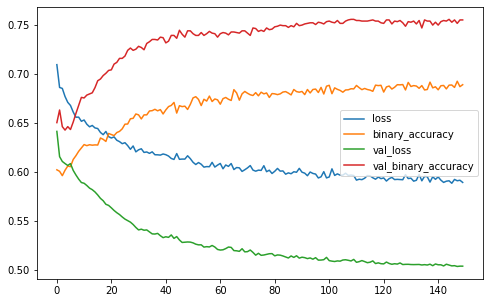

In [90]:
#show the graph for model result
pd.DataFrame(history_s.history).plot(figsize=(8, 5))
plt.show()

From the graph above it is analyzed that gradient exploding is prevented and gradient vanishing doesn't exist. Result obtained is quite good with low loss and enhanced binary accuracy, but the result still can be improved.

In [91]:
model_s.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                3744      
                                                                 
 dense_1 (Dense)             (None, 64)                6208      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

In [92]:
#print model evaluation
model_f.evaluate(train_dataset)

103/103 [==============================] - 0s 2ms/step - loss: 0.7917 - binary_accuracy: 0.3975


[0.7917009592056274, 0.39749082922935486]

In [93]:
#do model prediction
y_train_pred_f = model_f.predict(X_train_balanced)
y_test_pred_f = model_f.predict(X_test_enc)

44/44 [==============================] - 0s 1ms/step


In [94]:
#print accuracy score 
print('accuracy score train : ',accuracy_score(y_train_balanced,np.where(y_train_pred_f> 0.5, 1 , 0)))
print('accuracy score test : ',accuracy_score(y_test_enc,np.where(y_test_pred_f> 0.5, 1 , 0)))

accuracy score train :  0.3974908200734394
accuracy score test :  0.5331905781584583


From the accuracy it is seen that the model is underfit because of low accuracy and also big difference between test and train. Therefore the model need to enhanced and it might improved.

In [95]:
#print classification report
print('-----------train-------------')
print(classification_report(y_train_balanced,np.where(y_train_pred_f> 0.50, 1 , 0)))
print('-----------test-------------')
print(classification_report(y_test_enc,np.where(y_test_pred_f> 0.50, 1 , 0)))

-----------train-------------
              precision    recall  f1-score   support

           0       0.43      0.65      0.52      3268
           1       0.29      0.14      0.19      3268

    accuracy                           0.40      6536
   macro avg       0.36      0.40      0.35      6536
weighted avg       0.36      0.40      0.35      6536

-----------test-------------
              precision    recall  f1-score   support

           0       0.68      0.67      0.67      1019
           1       0.17      0.18      0.17       382

    accuracy                           0.53      1401
   macro avg       0.43      0.42      0.42      1401
weighted avg       0.54      0.53      0.54      1401



From the row 1 in each classification report for train and test it is seen that the model has low precision but better in recall. There are also huge gap between train and test result. The model is inadequate for thid dataset, need to be improved.

#### Model evaluation for functional model

In [96]:
#Model evaluation
keras.backend.clear_session()
history_f = model_f.fit(train_dataset, batch_size=64, epochs=150, validation_data= val_dataset)

Epoch 1/150
103/103 [==============================] - 1s 3ms/step - loss: 0.7081 - binary_accuracy: 0.5329 - val_loss: 0.9147 - val_binary_accuracy: 0.3830
Epoch 2/150
103/103 [==============================] - 0s 2ms/step - loss: 0.7150 - binary_accuracy: 0.5202 - val_loss: 0.8991 - val_binary_accuracy: 0.3918
Epoch 3/150
103/103 [==============================] - 0s 2ms/step - loss: 0.7079 - binary_accuracy: 0.5278 - val_loss: 0.9024 - val_binary_accuracy: 0.3947
Epoch 4/150
103/103 [==============================] - 0s 2ms/step - loss: 0.7005 - binary_accuracy: 0.5280 - val_loss: 0.8977 - val_binary_accuracy: 0.3994
Epoch 5/150
103/103 [==============================] - 0s 2ms/step - loss: 0.6984 - binary_accuracy: 0.5329 - val_loss: 0.8645 - val_binary_accuracy: 0.4012
Epoch 6/150
103/103 [==============================] - 0s 2ms/step - loss: 0.6895 - binary_accuracy: 0.5438 - val_loss: 0.8759 - val_binary_accuracy: 0.4094
Epoch 7/150
103/103 [==============================] - 0s 

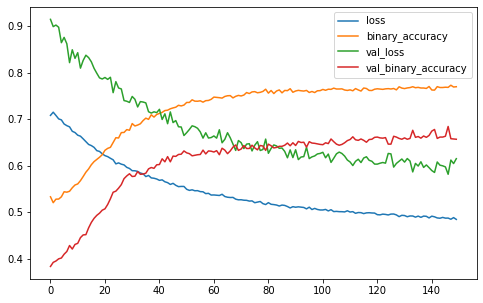

In [97]:
#show the graph for model result
pd.DataFrame(history_f.history).plot(figsize=(8, 5))
plt.show()

From the graph above it is analyzed that gradient exploding is prevented and gradient vanishing doesn't exist. Result obtained is quite good with low loss and enhanced binary accuracy evethough there is huge loss in the beginning but it is improved during the epochs.

In [98]:
model_f.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 38)]         0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 96)           3744        ['input_1[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 64)           6208        ['dense_4[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 32)           2080        ['dense_5[0][0]']                
                                                                                              

In [99]:
#print model evaluation
model_s.evaluate(train_dataset)

103/103 [==============================] - 0s 2ms/step - loss: 0.5053 - binary_accuracy: 0.7555


[0.5053210258483887, 0.7555079460144043]

In [100]:
#do model prediction
y_train_pred_s = model_s.predict(X_train_balanced)
y_test_pred_s = model_s.predict(X_test_enc)

44/44 [==============================] - 0s 1ms/step


In [101]:
#print accuracy score
print('accuracy score train : ', accuracy_score(y_train_balanced,np.where(y_train_pred_s> 0.5, 1 , 0)))
print('accuracy score test : ', accuracy_score(y_test_enc,np.where(y_test_pred_s> 0.5, 1 , 0)))

accuracy score train :  0.7555079559363526
accuracy score test :  0.7394718058529621


From the accuracy it is seen that the model is quite goodfit because of high accuracy and also small difference between test and train. Therefore the model is good for the dataset. But should be seen in another parameter, classification report.

In [102]:
#print classification report best param
print('-----------train-------------')
print(classification_report(y_train_balanced,np.where(y_train_pred_s> 0.50, 1 , 0)))
print('-----------test-------------')
print(classification_report(y_test_enc,np.where(y_test_pred_s> 0.50, 1 , 0)))

-----------train-------------
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      3268
           1       0.75      0.77      0.76      3268

    accuracy                           0.76      6536
   macro avg       0.76      0.76      0.76      6536
weighted avg       0.76      0.76      0.76      6536

-----------test-------------
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1019
           1       0.52      0.74      0.61       382

    accuracy                           0.74      1401
   macro avg       0.70      0.74      0.71      1401
weighted avg       0.78      0.74      0.75      1401



From the row 1 in each classification report for train and test it is seen that the model has low precision in test but better in recall. There are also huge gap between train and test result especially in precission. The model is overfit.

#### Model evaluation for improvement model

In [103]:
#Model evaluation
keras.backend.clear_session()
history_fi = model_fi.fit(train_dataset, batch_size=64, epochs=150, validation_data= val_dataset)

Epoch 1/150
103/103 [==============================] - 2s 5ms/step - loss: 0.6706 - binary_accuracy: 0.6365 - val_loss: 0.5663 - val_binary_accuracy: 0.7257
Epoch 2/150
103/103 [==============================] - 0s 3ms/step - loss: 0.6387 - binary_accuracy: 0.6551 - val_loss: 0.5269 - val_binary_accuracy: 0.7310
Epoch 3/150
103/103 [==============================] - 0s 3ms/step - loss: 0.6324 - binary_accuracy: 0.6639 - val_loss: 0.5017 - val_binary_accuracy: 0.7643
Epoch 4/150
103/103 [==============================] - 0s 3ms/step - loss: 0.6402 - binary_accuracy: 0.6611 - val_loss: 0.4872 - val_binary_accuracy: 0.7649
Epoch 5/150
103/103 [==============================] - 0s 3ms/step - loss: 0.6263 - binary_accuracy: 0.6701 - val_loss: 0.4748 - val_binary_accuracy: 0.7667
Epoch 6/150
103/103 [==============================] - 0s 3ms/step - loss: 0.6241 - binary_accuracy: 0.6709 - val_loss: 0.4773 - val_binary_accuracy: 0.7725
Epoch 7/150
103/103 [==============================] - 0s 

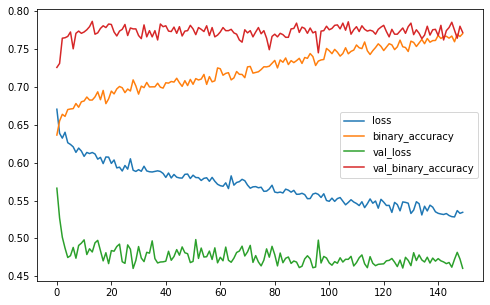

In [104]:
#show the graph for model result
pd.DataFrame(history_fi.history).plot(figsize=(8, 5))
plt.show()

From the graph above it is analyzed that gradient exploding is prevented and gradient vanishing doesn't exist. Result obtained is quite good with low loss and high binary accuracy.

In [105]:
model_fi.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 96)                3744      
                                                                 
 dense_9 (Dense)             (None, 64)                6208      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                      

In [106]:
#print model evaluation
model_fi.evaluate(train_dataset)

103/103 [==============================] - 0s 2ms/step - loss: 0.4581 - binary_accuracy: 0.7918


[0.4581271708011627, 0.7917686700820923]

In [107]:
#do model prediction
y_train_pred_fi = model_fi.predict(X_train_balanced)
y_test_pred_fi = model_fi.predict(X_test_enc)

44/44 [==============================] - 0s 1ms/step


In [108]:
#print accuracy score
print('accuracy score train : ',accuracy_score(y_train_balanced,np.where(y_train_pred_fi> 0.50, 1 , 0)))
print('accuracy score test : ',accuracy_score(y_test_enc,np.where(y_test_pred_fi> 0.50, 1 , 0)))

accuracy score train :  0.7917686658506732
accuracy score test :  0.7501784439685939


From the accuracy it is seen that the model is quite goodfit because of high accuracy and also small difference between test and train. Therefore the model is good for the dataset. But should be seen further in another parameter, classification report.

In [109]:
#print classification report
print('-----------train-------------')
print(classification_report(y_train_balanced,np.where(y_train_pred_fi> 0.50, 1 , 0)))
print('-----------test-------------')
print(classification_report(y_test_enc,np.where(y_test_pred_fi> 0.50, 1 , 0)))

-----------train-------------
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      3268
           1       0.77      0.83      0.80      3268

    accuracy                           0.79      6536
   macro avg       0.79      0.79      0.79      6536
weighted avg       0.79      0.79      0.79      6536

-----------test-------------
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1019
           1       0.53      0.76      0.62       382

    accuracy                           0.75      1401
   macro avg       0.71      0.75      0.72      1401
weighted avg       0.79      0.75      0.76      1401



From the row 1 in each classification report for train and test it is seen that the model has low in precision but far better in recall. There are still a gap in precission between train and test. But overall performance (f1-score is better), with higher recall. When the goal is to detect higher recall: detect more true churn among the actual true churn, this result is adequate. Therefore, continue to the model inference with this model.

---
# 9. Model Inference

In [110]:
#print df inf
df_inf.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7658-UYUQS,Male,1,Yes,No,21,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic),86.55,1857.25,No
1,4163-KIUHY,Male,0,No,No,35,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,25.60,901.25,No
2,5494-WOZRZ,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.00,5999.85,No
3,3373-YZZYM,Male,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.20,19.20,No
4,6234-PFPXL,Male,0,Yes,No,22,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,Month-to-month,No,Credit card (automatic),95.90,2234.95,No


In [111]:
#do feature selection
X_inf_fs = df_inf[selected_feat]

In [112]:
#find missing value
X_inf_fs.isnull().sum().sum()

0

note: no missing value

In [113]:
#dataset encoding and scaling
X_inf_enc = preprocess.transform(X_inf_fs)

In [114]:
#model predict
y_inf_pred_fi = model_fi.predict(X_inf_enc)

1/1 [==============================] - 0s 129ms/step


In [115]:
#convert proba to a category with threshold if proba > 0.5 then the data will be concluded as category 1
y_inf_pred_fi = np.where(y_inf_pred_fi > 0.5, 1 , 0)

In [116]:
#do inverse to transform back 0-1 category to yes and no with 0 = No and 1 = yes 
y_inf_pred_fi = labelencoder.inverse_transform(y_inf_pred_fi)

c:\Users\SBD-HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
#make it dataframe
y_inf_pred_fi = pd.DataFrame(y_inf_pred_fi , columns=['churn_pred'])

In [118]:
# Concate between Inference-Set and Prediction
df_inf_bestparam = pd.concat([df_inf, y_inf_pred_fi], axis=1)
df_inf_bestparam.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_pred
0,7658-UYUQS,Male,1,Yes,No,21,Yes,No,Fiber optic,No,...,No,Yes,No,Month-to-month,No,Bank transfer (automatic),86.55,1857.25,No,Yes
1,4163-KIUHY,Male,0,No,No,35,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,25.60,901.25,No,Yes
2,5494-WOZRZ,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.00,5999.85,No,No


In [119]:
#compare prediction result and actual data
df_inf_bestparam[['Churn','churn_pred']]

,Churn,churn_pred
0,No,Yes
1,No,Yes
2,No,No
3,No,No
4,No,No
5,No,No
6,Yes,No
7,No,No
8,Yes,Yes
9,No,No


From the inference model it is obtained that the prediction result has 5 missprediction out of 30 data, therefore the accuracy for inference data is 83.3%. The result is good, this model is good for the dataset.

---
# 10. Model Saving

Model saving for front end and backend

In [120]:
#freeze model
model_fi.trainable = False

In [121]:
#do the model summary to prove that this model is no longer trainable
model_fi.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 96)                3744      
                                                                 
 dense_9 (Dense)             (None, 64)                6208      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                      

In [122]:
#save model
model_fi.save("churn_rate")

INFO:tensorflow:Assets written to: churn_rate\assets


In [123]:
# save the best pipeline
with open("preprop.pkl", "wb") as model_file:
    pickle.dump(preprocess, model_file)

In [124]:
#make data inference to a list for fe be development
X_inf_enc.tolist()

[[0.21214061932044384,
  0.7234730997269976,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  21.0,
  1.0],
 [0.10182380466077004,
  -1.310142127467668,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  35.0,
  0.0],
 [0.6901724565685241,
  0.5716609703794058,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  71.0,
  0.0],
 [4.0387955157830235e-05,
  -1.523680067648896,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,


---
# 11. Conclusion

From data loading and EDA:
- The total charges is known to be in str format (object), but actually it is in number(float), therefore change the format to float.
- The data between target 1 and target 2 is mildly imbalance (73.5% vs 26.5% between No and Yes), therefore imbalance handling (smote) is needed.
- The columns that does not have any effect to the customer churn rate is: Gender, PhoneService, and MultipleLines. The customerID is also automatically included to this.
- The columns that does have significant effect to the customer churn rate is: TotalCharges, MonthlyCharges, PaymentMethod, PaperlessBilling, Contract, StreamingMovies, StreamingTV, TechSupport, DeviceProtection, OnlineBackup, OnlineSecurity, InternetService, tenure, Dependents, Partner, and  SeniorCitizen.

Feature selection:
- Category that selected are: 'Partner', 'Dependents', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','tenure', 'SeniorCitizen','MonthlyCharges','TotalCharges'. Total of 16 categories.

Missing value handling:
- Because of total charges is changed the format to float, there is NaN data. There is 11 missing values that exist in the three datasets, and all of them come from TotalCharges. From the quantity, 11/7013 is 0.16% and it is actually small and is decided to drop the rows.

Outliers handling:
- There is 2 numerical column, and 14 categorical columns. 
numerical = 'MonthlyCharges','TotalCharges'
categorical = 'Partner', 'Dependents', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','tenure', 'SeniorCitizen'
- MonthlyCharges is normaly distributed and TotalCharges is skewed. For both of category there is no outliers, outliers handling isn't needed. But the scaler between categories must be separated due to difference in distribution.

Scaling and encoding:
- In target label No will be converted to 0 and Yes converted to 1 with label encoder. Because of finding churn customer (yes) is the priority of this learning, then we focus in row 1 classification report (when 1 as 1).
- Scaling and encoding in the dataset will use onehot encoder, minmaxscaler, and standard scaller.

Model Evaluation:
- Improved model has best performance. With overall performance (f1-score is better), with higher recall and a goodfit. When the goal is higher recall: detect more true churn among the actual true churn, this result is adequate according to the goal.

Model inference:
- The prediction result has 5 missprediction out of 30 data, therefore the accuracy for inference data is 83.3%. The result is good, this model is good for the dataset.


For further improvement:
- Try another parameter tunning for the model
- Try improved functional model
- Add features that excluded